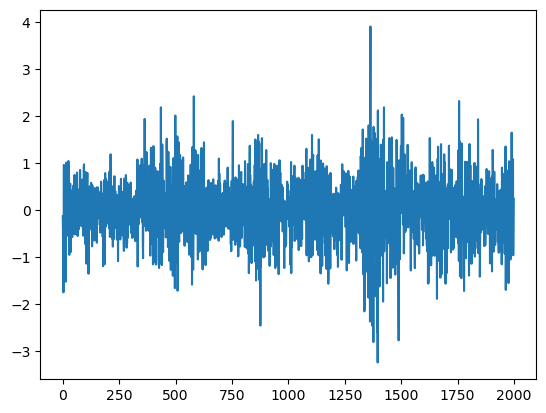

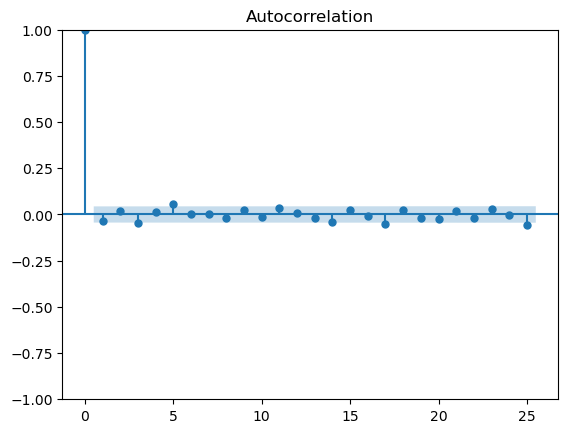

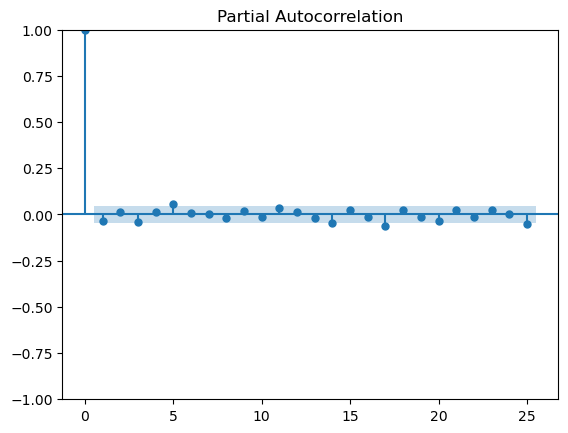

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = pd.read_csv('/Users/mac/Desktop/HOMEWORK1_TIME_SERIES/Homework_1_DATA.csv', sep = ";", decimal = ",")
series1 = data.iloc[:,0].dropna()
series2 = data.iloc[:,1].dropna()
series3 = data.iloc[:,2].dropna()
series4 = data.iloc[:,3].dropna()
series5 = data.iloc[:,4].dropna()
series6 = data.iloc[:,5].dropna()
series7 = data.iloc[:,6].dropna()

y = series5

num_lags=25 # to discuss

plt.plot(y)
plt.show()
plot_acf(y,lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags,method="ols")
plt.show()

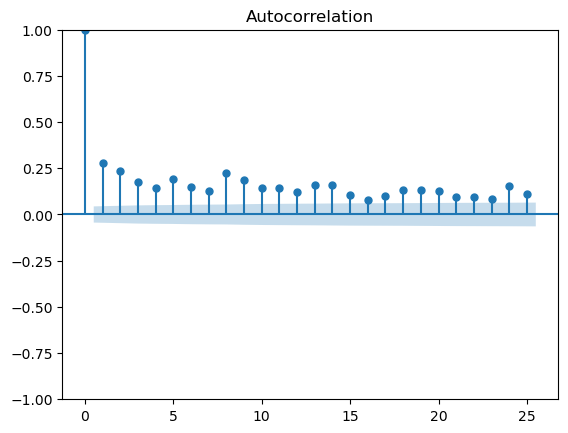

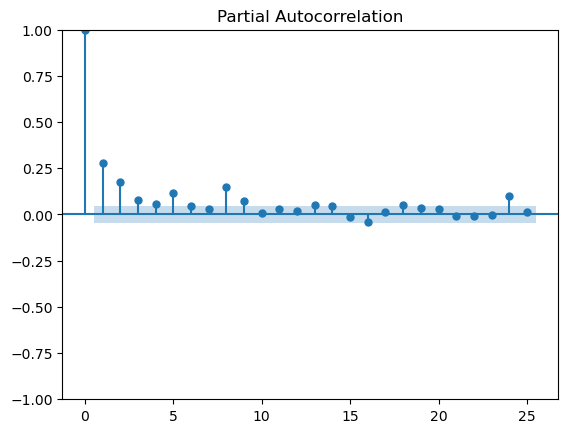

In [375]:
plot_acf(y**2,lags=num_lags)
plt.show()
plot_pacf(y**2,lags=num_lags,method="ols")
plt.show()

In [376]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(y)
std = np.std(y)
kurtosis = kurtosis(y)
skewness = skew(y)

print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)

Mean 0.0071755 Standard deviation 0.6796195970539328 Skewness -0.0875139711322578 Kurtosis 1.3736125996263961


In [377]:
#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)
#pvalue<0.05 reject Ho
#pvalue>0.05 NOOOO reject Ho

adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the original series
Statistic Value: -19.261150656694404
p-value: 0.0


In [378]:
from scipy.stats import shapiro
# Normality test
b=y**2
saphiro = shapiro(y)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(y, lags=[20])
print((box_test))

Saphiro ShapiroResult(statistic=0.9904744029045105, pvalue=3.4684974337118035e-10)
     lb_stat  lb_pvalue
20  33.15052   0.032479


## DIFFERENCE OPERATOR TRANSFORMATION

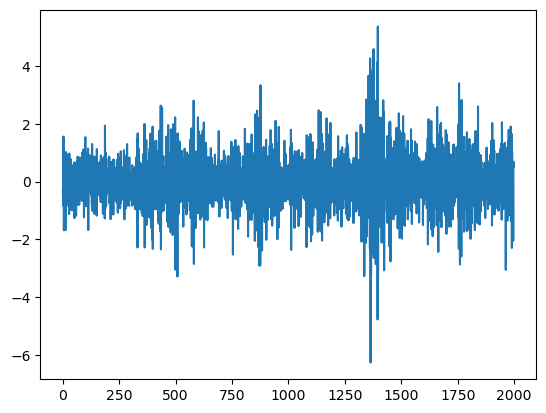

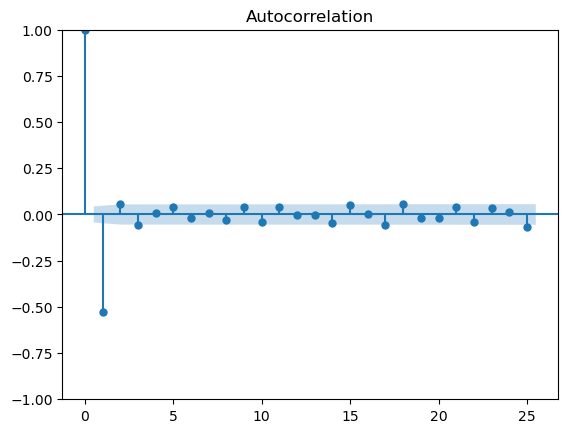

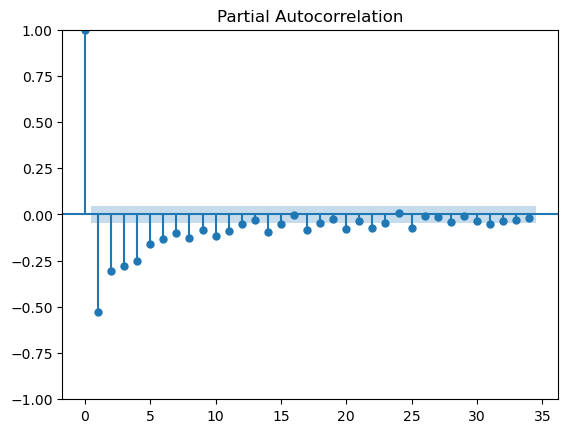

In [379]:
a=np.diff(y)
plt.plot(a)
plt.show()
plot_acf(a,lags=num_lags)
plt.show()
plot_pacf(a,method="ols")
plt.show()

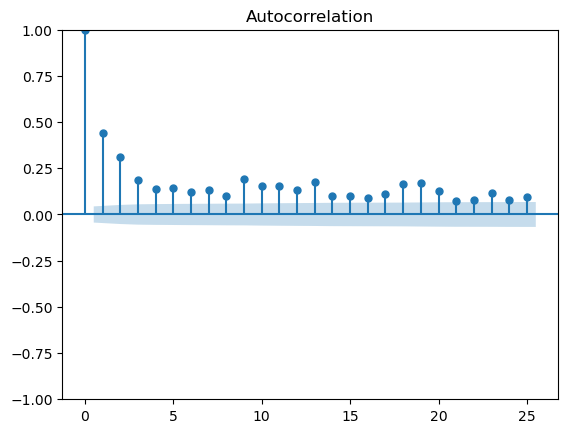

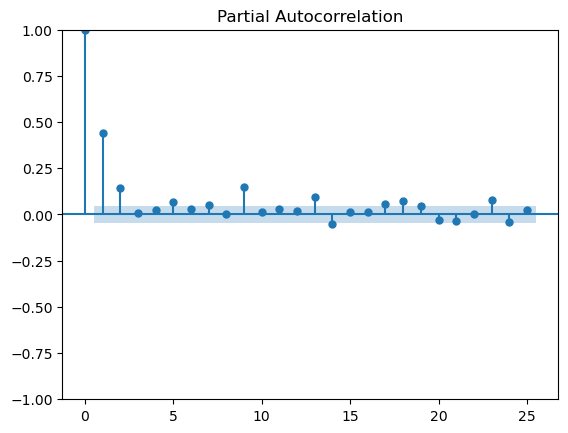

In [380]:
plot_acf(a**2,lags=num_lags)
plt.show()
plot_pacf(a**2,lags=num_lags,method="ols")
plt.show()

In [381]:
#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)
#pvalue<0.05 reject Ho
#pvalue>0.05 NOOOO reject Ho

adf_test = sm.tsa.stattools.adfuller(a,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the original series
Statistic Value: -23.597560942382916
p-value: 0.0


In [382]:
from scipy.stats import shapiro
# Normality test
b=a**2
saphiro = shapiro(a)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(a, lags=[20])
print((box_test))

Saphiro ShapiroResult(statistic=0.9811767339706421, pvalue=1.4078838489383553e-15)
       lb_stat      lb_pvalue
20  605.917965  1.630532e-115


## SECOND DIFFERENCE OPERATOR

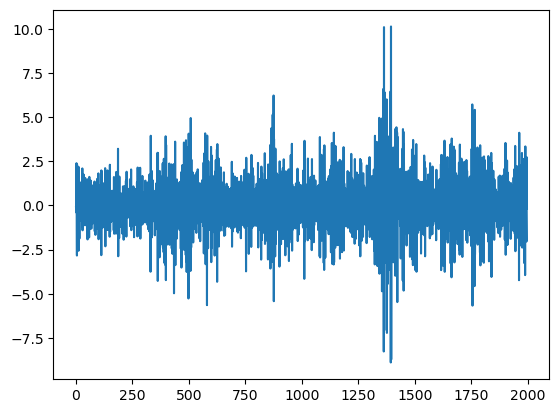

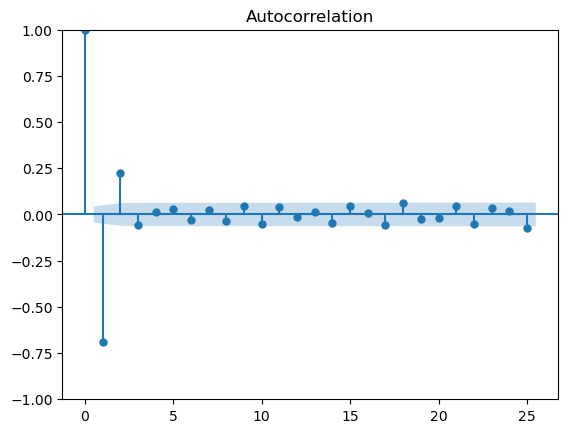

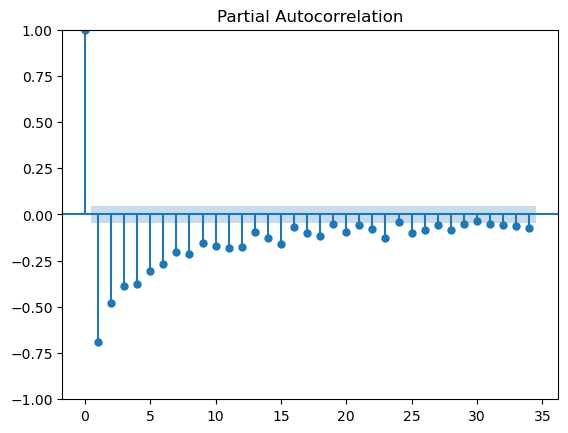

In [383]:
a2=np.diff(a)
plt.plot(a2)
plt.show()
plot_acf(a2,lags=num_lags)
plt.show()
plot_pacf(a2,method="ols")
plt.show()

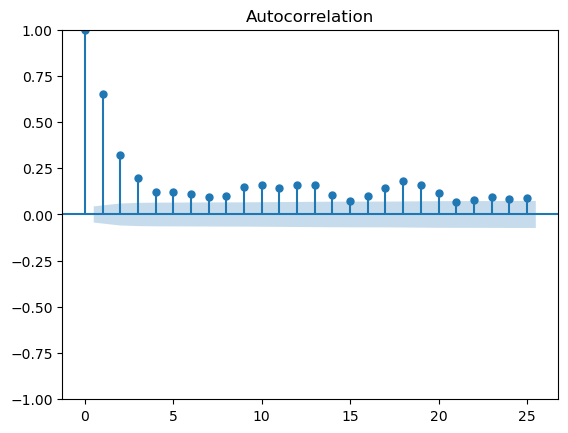

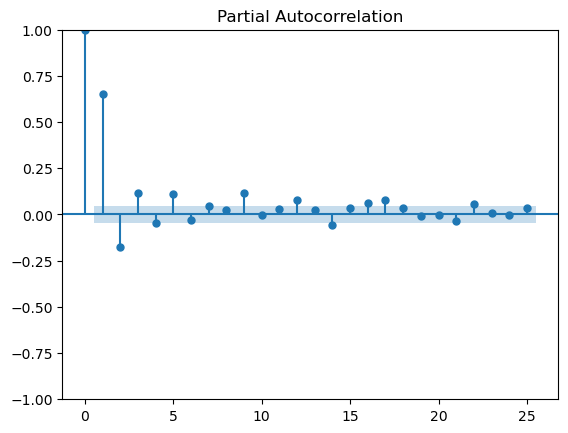

In [384]:
plot_acf(a2**2,lags=num_lags)
plt.show()
plot_pacf(a2**2,lags=num_lags,method="ols")
plt.show()

In [385]:
#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)
#pvalue<0.05 reject Ho
#pvalue>0.05 NOOOO reject Ho

adf_test = sm.tsa.stattools.adfuller(a2,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the original series
Statistic Value: -30.63179365987083
p-value: 0.0


In [386]:
from scipy.stats import shapiro
# Normality test
b=a2**2
saphiro = shapiro(a2)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(a2, lags=[20])
print((box_test))

Saphiro ShapiroResult(statistic=0.978115439414978, pvalue=6.116945043292476e-17)
        lb_stat      lb_pvalue
20  1110.150941  1.203034e-222


## LOG OPERATOR TRANSFORMATION


/var/folders/6x/znm1f9xs3zl44ysvq1fl96100000gp/T/ipykernel_59975/1111840324.py:1: RuntimeWarning: divide by zero encountered in log
  b = np.log(a)
/var/folders/6x/znm1f9xs3zl44ysvq1fl96100000gp/T/ipykernel_59975/1111840324.py:1: RuntimeWarning: invalid value encountered in log
  b = np.log(a)


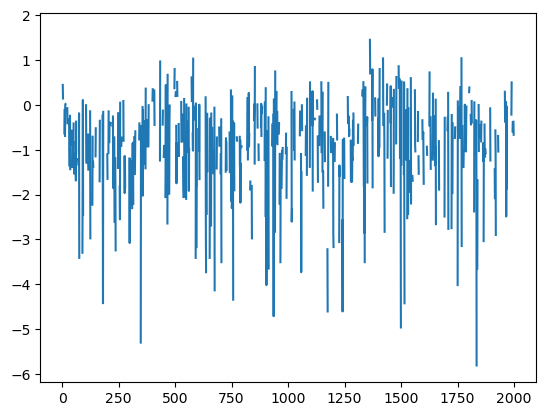

/Users/mac/miniconda3/envs/ber/lib/python3.10/site-packages/matplotlib/axes/_base.py:2532: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


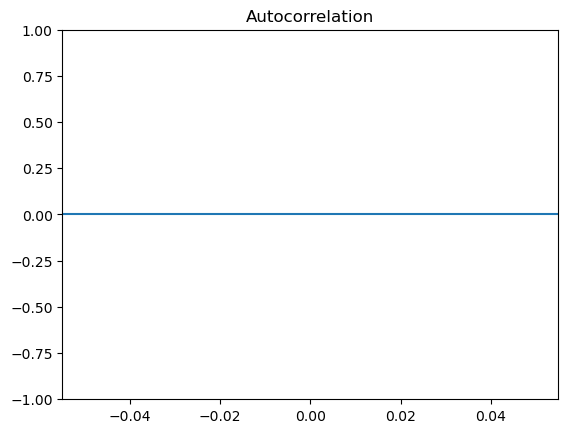

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares

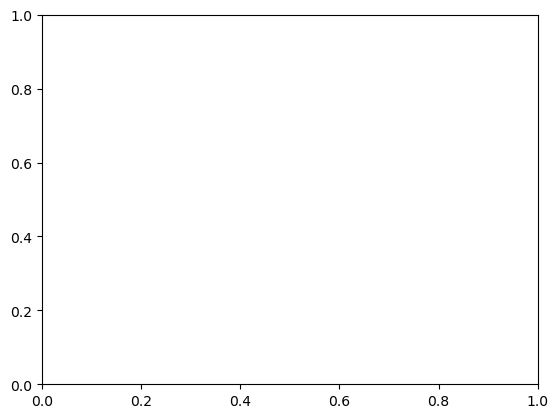

In [387]:
b = np.log(a)
plt.plot(b)
plt.show()
plot_acf(b,lags=num_lags)
plt.show()
plot_pacf(b,method="ols")
plt.show()

In [4]:
import sys
sys.version


'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'